In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

/var/folders/zq/5_ydv5613ml2p2l82yrw54980000gn/T/ipykernel_9184/3646528746.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  base.prepare(engine, reflect = True)


In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measure = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent = session.query(measure.date).order_by(measure.date.desc()).first()

if recent:
    print(f"The most recent date in the database is: {recent[0]}")
else:
    print("No dates found in the database")    

The most recent date in the database is: 2017-08-23


In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.

from datetime import timedelta
one_year_ago = dt.date(2017, 8, 23) + timedelta(days=-365)
one_year_ago


datetime.date(2016, 8, 23)

In [23]:
# Perform a query to retrieve the data and precipitation scores

date_score = session.query(measure.date,func.avg(measure.prcp)).\
    filter(measure.date>=one_year_ago).\
    group_by(measure.date).all()


In [26]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(date_score, columns = ['date', 'prcp'])
df.date = pd.to_datetime(df.date)
# Sort the dataframe by date
df.set_index('date', inplace=True)
df.sort_values('date')
df

,prcp
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


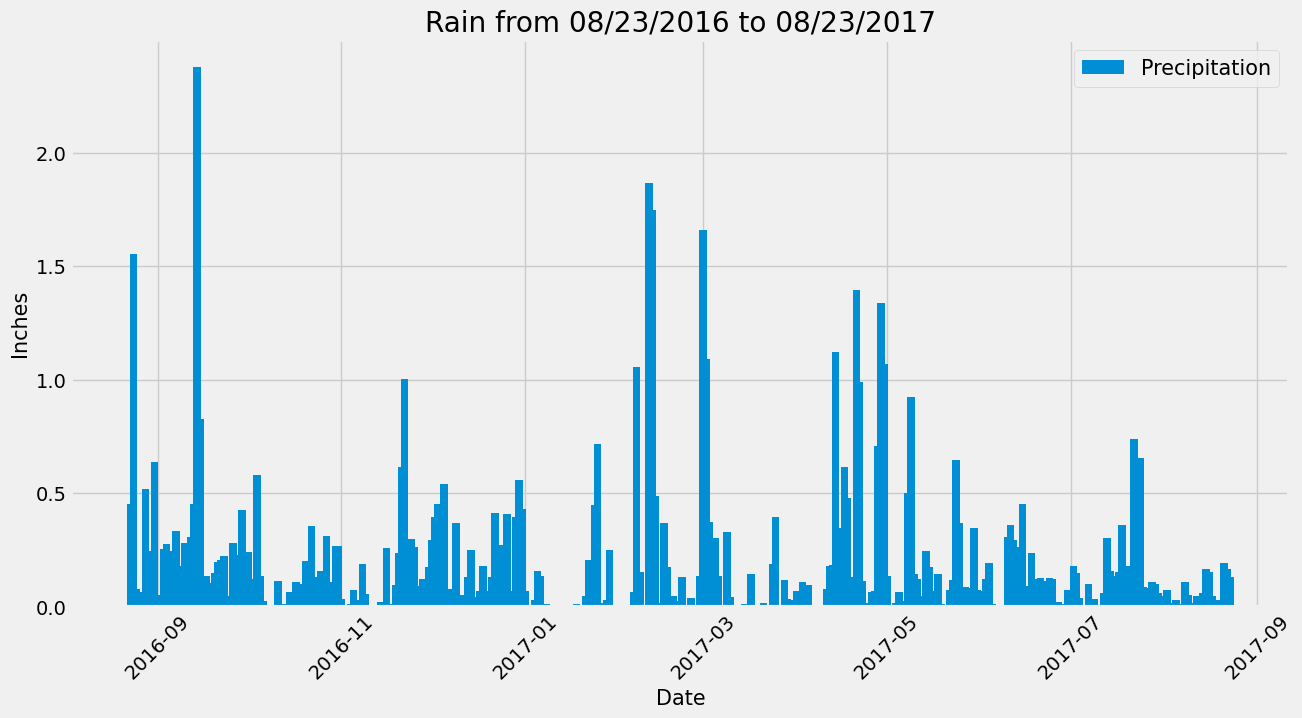

In [56]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(14, 7))

plt.bar(df.index,df['prcp'],width=2.5)
plt.title('Rain from 08/23/2016 to 08/23/2017')
plt.xlabel('Date',fontsize =15)
plt.ylabel('Inches', fontsize =15)
plt.xticks(rotation=45)
plt.legend(['Precipitation'],fontsize =15)
plt.show()

In [57]:
fig.savefig("Graphs & Images/PRCP")

In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(func.count(station.station)).scalar()
num_stations

9

In [40]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
list_stations = session.query(station.station, station.name, func.count(station.station)).\
    filter(station.station == measure.station).\
    group_by(station.station).order_by(func.count(station.station).desc()).all()

list_stations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low = session.query(func.min(measure.tobs)).\
    filter(station.station == measure.station).\
    filter(station.name == 'WAIHEE 837.5, HI US').scalar()

high = session.query(func.max(measure.tobs)).\
    filter(station.station == measure.station).\
    filter(station.name == 'WAIHEE 837.5, HI US').scalar()

avg = session.query(func.avg(measure.tobs)).\
    filter(station.station == measure.station).\
    filter(station.name == 'WAIHEE 837.5, HI US').scalar()


print("The most active station is WAIHEE 837.5, HI US")
print(f"The lowest temp recorded at this location is {low}")
print(f"The highest temp recorded at this location is {high}")
print(f"The average temp recorded at this location is {avg}")


The most active station is WAIHEE 837.5, HI US
The lowest temp recorded at this location is 54.0
The highest temp recorded at this location is 85.0
The average temp recorded at this location is 71.66378066378067


In [52]:
last_year_temp = session.query(measure.tobs).\
    filter(measure.date>='2016-08-23').\
    filter(station.station == measure.station).\
    filter(station.name == 'WAIHEE 837.5, HI US').all()
study = [l[0] for l in last_year_temp]
study

[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

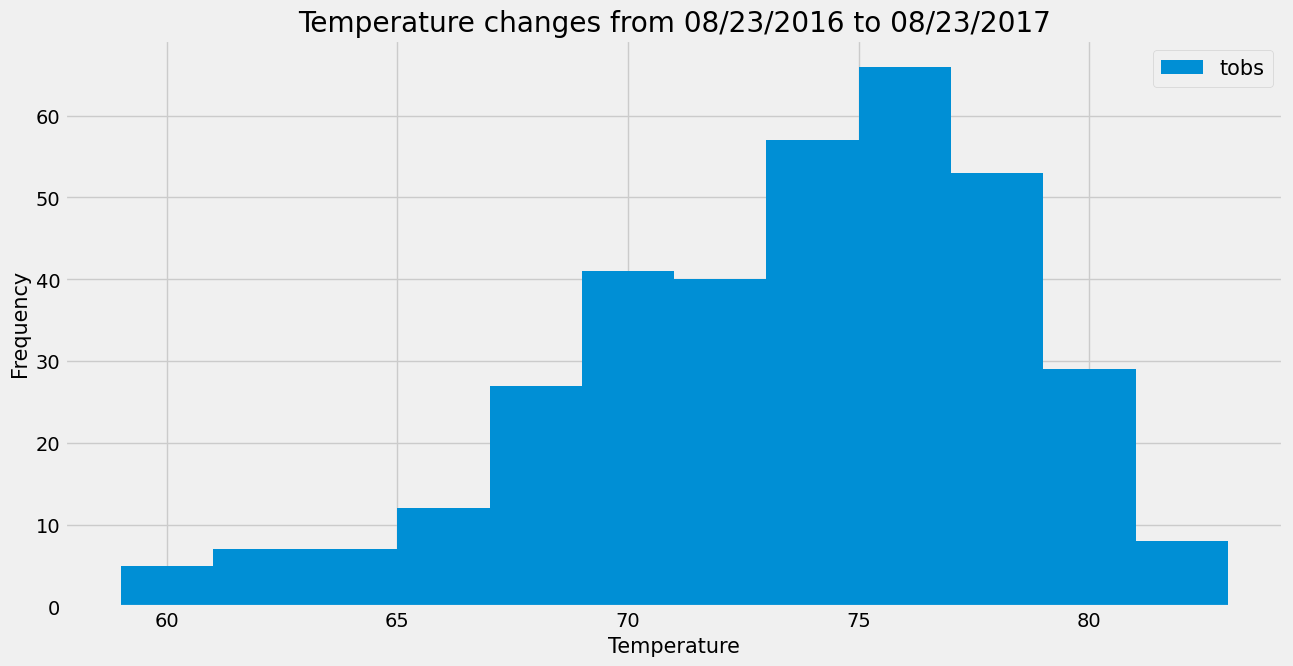

In [65]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
fig1, ax1 = plt.subplots(figsize=(14, 7))

plt.hist(study, 12, label='tobs')
plt.title('Temperature changes from 08/23/2016 to 08/23/2017')
plt.xlabel('Temperature',fontsize =15)
plt.ylabel('Frequency', fontsize =15)
plt.legend(fontsize =15)
plt.show()

In [66]:
fig1 = fig.savefig('Graphs & Images/TEMP')

# Close Session

In [61]:
# Close Session
session.close()